# Inverted Indexing

Inverted indexing is a widely used technique in text processing that involves creating an index data structure that maps terms or words to the documents 
or records in which they occur. This type of indexing inverts the relationship between terms and documents with the goal of fast and efficient retrieval 
of documents containing specific terms or words. While this indexing is similar to term-based indexing, it differs in the following ways described in 
the table below:

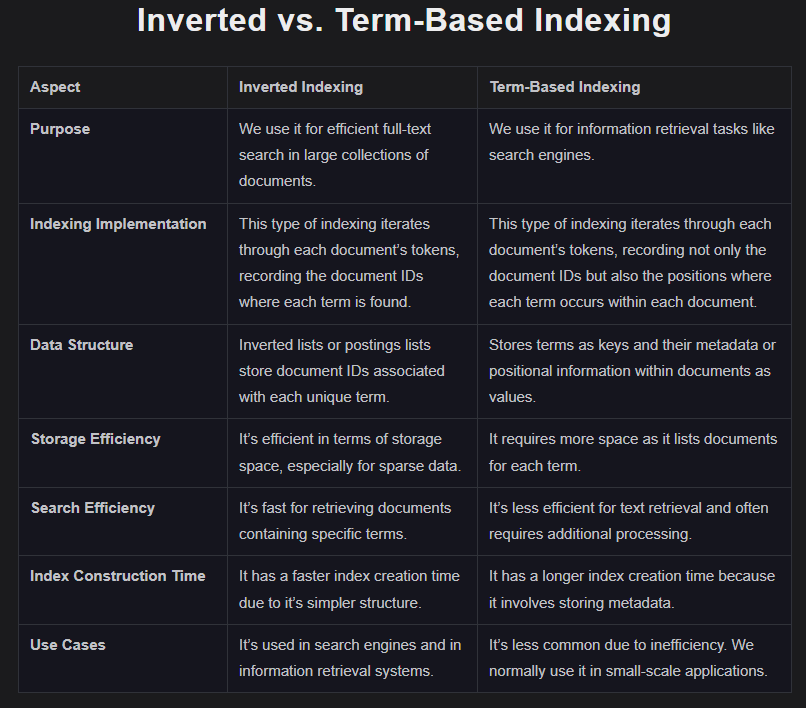




In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

In [2]:
# Read the necessary dataset

df = pd.read_csv("C:/Users/ariji/OneDrive/Desktop/Data/reviews.csv")
df.head()

,review_id,text
0,txt145,The software had a steep learning curve at fir...
1,txt327,I'm really impressed with the user interface o...
2,txt209,The latest update to the software fixed severa...
3,txt825,I encountered a few glitches while using the s...
4,txt878,I was skeptical about trying the software init...


In [4]:
"""
We create a new column named tokens in the DataFrame by applying a lambda function to tokenize each review text and convert it to lowercase using word_
tokenize.

We initialize a set named stop_words with common English stopwords from the stopwords.words('english') list. Later, we further process the tokens column by applying another lambda function to filter out any stopwords from the tokenized words.

We initialize an empty defaultdict object named inverted_index to create an inverted index.

We iterate through the review_id and tokens columns in the DataFrame using itertuples, where each tuple (idx, tokens) represents the review’s index (idx) and its corresponding tokenized words (tokens). For each token in the tokenized words, we append the review index idx to the list associated with that token in inverted_index.

Finally, we loop through the items in inverted_index and print each term along with the list of reviews where the term appears.

"""

df['tokens'] = df['text'].apply(lambda text: word_tokenize(text.lower())) 
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
inverted_index = defaultdict(list)
for idx, tokens in df[['review_id', 'tokens']].itertuples(index=False):
    for term in tokens:
        inverted_index[term].append(idx) 
for term, reviews in inverted_index.items():
    print(f"{term}: {reviews}")


software: ['txt145', 'txt327', 'txt209', 'txt825', 'txt878', 'txt718', 'txt316', 'txt247', 'txt515', 'txt913', 'txt341', 'txt688', 'txt137']
steep: ['txt145']
learning: ['txt145']
curve: ['txt145']
first: ['txt145']
,: ['txt145', 'txt145', 'txt825', 'txt878', 'txt718', 'txt316', 'txt247', 'txt341', 'txt943', 'txt688', 'txt136']
started: ['txt145']
appreciate: ['txt145', 'txt718']
powerful: ['txt145']
features: ['txt145', 'txt933', 'txt718', 'txt247']
.: ['txt145', 'txt327', 'txt327', 'txt209', 'txt825', 'txt878', 'txt933', 'txt718', 'txt316', 'txt247', 'txt515', 'txt913', 'txt341', 'txt943', 'txt688', 'txt136', 'txt137']
'm: ['txt327', 'txt341', 'txt688']
really: ['txt327']
impressed: ['txt327', 'txt688']
user: ['txt327', 'txt943', 'txt136']
interface: ['txt327', 'txt136']
's: ['txt327']
intuitive: ['txt327']
easy: ['txt327']
navigate: ['txt327']
latest: ['txt209']
update: ['txt209']
fixed: ['txt209']
several: ['txt209']
bugs: ['txt209']
improved: ['txt209', 'txt316']
overall: ['txt209

# Positional Indexing

In positional indexing, we index terms or words and record their positions or occurrences within documents. This approach enables us to retrieve 
information more precisely based on the relative positions of terms within documents. An application of positional indexing is in phrase searching, 
where the order and proximity of terms within a document are critical for accurate retrieval. Let’s apply positional indexing using Python in the 
code example below. We’ll read reviews from a CSV file, tokenize them into words, remove common Engish stopwords, and then create a positional index 
that maps each term to a dictionary of review IDs along with the positions of that term within those reviews, facilitating detailed word-level 
analysis of the reviews. Lastly, we’ll showcase word retrieval from the positional index.


In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict 

In [6]:
# Read the necessary dataset

df = pd.read_csv("C:/Users/ariji/OneDrive/Desktop/Data/reviews.csv")
df.head()

,review_id,text
0,txt145,The software had a steep learning curve at fir...
1,txt327,I'm really impressed with the user interface o...
2,txt209,The latest update to the software fixed severa...
3,txt825,I encountered a few glitches while using the s...
4,txt878,I was skeptical about trying the software init...


In [7]:
"""
We tokenize the review text for each row in the DataFrame, converting the text to lowercase using word_tokenize, and store the tokens in a new tokens column.

We initialize a set named stop_words with common English stopwords from the stopwords.words('english') list and further process the tokens column by applying a lambda function to filter out any stopwords from the tokenized words.

We create an empty defaultdict object named positional_index, which we’ll use to create a detailed positional index of terms within the reviews.

We iterate through the review_id and tokens columns in the df DataFrame using itertuples, where each idx and tokens represents the review’s index and its corresponding tokenized words, respectively. For each token in the tokenized words, we add the current review’s index idx to the list associated with that token in positional_index, along with the position of the token in the review.

We then loop through the items in positional_index and print each term (token) along with the dictionary of positions for that term within the reviews.

We define a list of requested_words that we want to retrieve positions for and print a separator line and a header to indicate the beginning of the requested word positions display.

Lastly, we iterate through each word in requested_words:

If the word is present in positional_index, we retrieve and print the positions of that word within the corresponding reviews.

If a word isn’t found in positional_index, we print a message indicating that the word was not found.

"""

df['tokens'] = df['text'].apply(lambda text: word_tokenize(text.lower())) 
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
positional_index = defaultdict(dict)
for idx, tokens in df[['review_id', 'tokens']].itertuples(index=False):
    for pos, term in enumerate(tokens):
        if idx not in positional_index[term]:
            positional_index[term][idx] = []
        positional_index[term][idx].append(pos) 
for term, positions in positional_index.items():
    print(f"{term}: {positions}") 
requested_words = ["product", "performance", "customer"] 
print("\nRequested Word Positions:")
for word in requested_words:
    if word in positional_index:
        positions = positional_index[word]
        print(f"{word}: {positions}")
    else:
        print(f"{word}: Not found in the positional index")
        

software: {'txt145': [0], 'txt327': [5], 'txt209': [2], 'txt825': [3], 'txt878': [2], 'txt718': [3], 'txt316': [3], 'txt247': [0], 'txt515': [2], 'txt913': [0], 'txt341': [5], 'txt688': [2], 'txt137': [2]}
steep: {'txt145': [1]}
learning: {'txt145': [2]}
curve: {'txt145': [3]}
first: {'txt145': [4]}
,: {'txt145': [5, 6], 'txt825': [4], 'txt878': [4], 'txt718': [5], 'txt316': [4], 'txt247': [4], 'txt341': [6], 'txt943': [4], 'txt688': [3], 'txt136': [5]}
started: {'txt145': [7]}
appreciate: {'txt145': [8], 'txt718': [0]}
powerful: {'txt145': [9]}
features: {'txt145': [10], 'txt933': [1], 'txt718': [10], 'txt247': [5]}
.: {'txt145': [11], 'txt327': [6, 11], 'txt209': [9], 'txt825': [10], 'txt878': [8], 'txt933': [8], 'txt718': [11], 'txt316': [10], 'txt247': [8], 'txt515': [9], 'txt913': [8], 'txt341': [11], 'txt943': [11], 'txt688': [9], 'txt136': [11], 'txt137': [7]}
'm: {'txt327': [0], 'txt341': [0], 'txt688': [4]}
really: {'txt327': [1]}
impressed: {'txt327': [2], 'txt688': [6]}
user